In [1]:
import numpy as np
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import sys
import matplotlib.pyplot as plt
import seaborn as sns
import scipy
import sklearn
import os
import cv2
from tqdm import tqdm

In [ ]:
def convertjpg(jpgfile,outdir,width=64,height=64):
    img=Image.open(jpgfile)   
    new_img=img.resize((width,height),Image.BILINEAR)   
    new_img.save(os.path.join(outdir,os.path.basename(jpgfile)))
for jpgfile in glob.glob('/root/autodl-tmp/thispersondoesnotexist.10k/*.jpg'):
    convertjpg(jpgfile,'/root/autodl-tmp/thispersondoesnotexist.10k')
for jpgfile in glob.glob('/root/autodl-tmp/0/*.jpg'):
    convertjpg(jpgfile,'/root/autodl-tmp/0')

In [2]:
def getFileName(filepath):
    path_list = []
    pathList = os.listdir(filepath)
    for allFile in pathList:
        everyFile = os.path.join(filepath, allFile)
        path_list.append(everyFile)
    return path_list
training_path = getFileName('/root/autodl-tmp/thispersondoesnotexist.10k')
testing_path = getFileName('/root/autodl-tmp/0')

In [3]:
training_path = training_path[:10000]

In [4]:
testing_img_path = training_path[:800] + testing_path[:200]
training_img_path = training_path[800:]

In [5]:
test_y = 800*[0] + 200*[1]
test_y = np.array(test_y)

In [6]:
train = np.array([cv2.imdecode(np.fromfile(path,dtype=np.uint8),-1)/ 255. for path in training_img_path])
train = train.reshape(9200,64,64,3)
print(train.shape)
test = np.array([cv2.imdecode(np.fromfile(path,dtype=np.uint8),-1)/ 255. for path in testing_img_path])
test = test.reshape(1000,64,64,3)
print(test.shape)

(9200, 64, 64, 3)
(1000, 64, 64, 3)


In [7]:
from sklearn.metrics import classification_report, accuracy_score
from sklearn.neighbors import LocalOutlierFactor

In [8]:
state = 1
outlier_fraction = 200/800

In [9]:
train_neg = [t.reshape(t.shape[0]* t.shape[1] * t.shape[2]) for t in train]
test_tmp = [t.reshape(t.shape[0]* t.shape[1] * t.shape[2]) for t in test]

In [10]:
cv_test_y = np.array([0]*184)

In [11]:
acc_list = []
for i in tqdm(range(50)):
    k = i + 1
    cv_test = train_neg[184*i:184*k]
    if i == 0:
        cv_train = train_neg[184*k:]
    else:
        cv_train = train_neg[:184*i] + train_neg[184*k:]
    clf = LocalOutlierFactor(n_neighbors = k, contamination = outlier_fraction, novelty=True)
    clf.fit(cv_train)
    result = clf.predict(cv_test)
    result = result.reshape(184,1)
    cv_test_y = cv_test_y.reshape(184,1)
    TP = 0
    FN = 0
    FP = ((cv_test_y==0) & (result==-1)).sum()
    TN = ((cv_test_y==0) & (result==1)).sum()
    acc = TN/184
    print('k = ', k)
    print('accuracy: %.3f'%(acc))
    print('In %d data of test set, TP: %d, FN: %d, FP: %d, TN: %d'%(len(cv_test_y),TP,FN,FP,TN))
    acc_list.append(acc)

  2%|▏         | 1/50 [00:46<37:51, 46.35s/it]

k =  1
accuracy: 0.832
In 184 data of test set, TP: 0, FN: 0, FP: 31, TN: 153


  4%|▍         | 2/50 [01:37<39:08, 48.92s/it]

k =  2
accuracy: 0.804
In 184 data of test set, TP: 0, FN: 0, FP: 36, TN: 148


  6%|▌         | 3/50 [02:27<38:59, 49.77s/it]

k =  3
accuracy: 0.821
In 184 data of test set, TP: 0, FN: 0, FP: 33, TN: 151


  8%|▊         | 4/50 [03:07<35:06, 45.79s/it]

k =  4
accuracy: 0.793
In 184 data of test set, TP: 0, FN: 0, FP: 38, TN: 146


 10%|█         | 5/50 [03:50<33:38, 44.86s/it]

k =  5
accuracy: 0.766
In 184 data of test set, TP: 0, FN: 0, FP: 43, TN: 141


 12%|█▏        | 6/50 [04:36<33:00, 45.01s/it]

k =  6
accuracy: 0.707
In 184 data of test set, TP: 0, FN: 0, FP: 54, TN: 130


 14%|█▍        | 7/50 [05:22<32:36, 45.50s/it]

k =  7
accuracy: 0.772
In 184 data of test set, TP: 0, FN: 0, FP: 42, TN: 142


 16%|█▌        | 8/50 [06:18<34:12, 48.87s/it]

k =  8
accuracy: 0.788
In 184 data of test set, TP: 0, FN: 0, FP: 39, TN: 145


 18%|█▊        | 9/50 [07:05<33:03, 48.39s/it]

k =  9
accuracy: 0.745
In 184 data of test set, TP: 0, FN: 0, FP: 47, TN: 137


 20%|██        | 10/50 [07:45<30:23, 45.58s/it]

k =  10
accuracy: 0.723
In 184 data of test set, TP: 0, FN: 0, FP: 51, TN: 133


 22%|██▏       | 11/50 [08:38<31:09, 47.95s/it]

k =  11
accuracy: 0.766
In 184 data of test set, TP: 0, FN: 0, FP: 43, TN: 141


 24%|██▍       | 12/50 [09:30<31:11, 49.24s/it]

k =  12
accuracy: 0.690
In 184 data of test set, TP: 0, FN: 0, FP: 57, TN: 127


 26%|██▌       | 13/50 [10:18<29:59, 48.65s/it]

k =  13
accuracy: 0.755
In 184 data of test set, TP: 0, FN: 0, FP: 45, TN: 139


 28%|██▊       | 14/50 [10:57<27:34, 45.97s/it]

k =  14
accuracy: 0.745
In 184 data of test set, TP: 0, FN: 0, FP: 47, TN: 137


 30%|███       | 15/50 [11:38<25:52, 44.36s/it]

k =  15
accuracy: 0.761
In 184 data of test set, TP: 0, FN: 0, FP: 44, TN: 140


 32%|███▏      | 16/50 [12:23<25:17, 44.64s/it]

k =  16
accuracy: 0.696
In 184 data of test set, TP: 0, FN: 0, FP: 56, TN: 128


 34%|███▍      | 17/50 [13:23<27:02, 49.17s/it]

k =  17
accuracy: 0.755
In 184 data of test set, TP: 0, FN: 0, FP: 45, TN: 139


 36%|███▌      | 18/50 [14:17<26:56, 50.50s/it]

k =  18
accuracy: 0.734
In 184 data of test set, TP: 0, FN: 0, FP: 49, TN: 135


 38%|███▊      | 19/50 [15:02<25:22, 49.12s/it]

k =  19
accuracy: 0.750
In 184 data of test set, TP: 0, FN: 0, FP: 46, TN: 138


 40%|████      | 20/50 [15:53<24:46, 49.53s/it]

k =  20
accuracy: 0.723
In 184 data of test set, TP: 0, FN: 0, FP: 51, TN: 133


 42%|████▏     | 21/50 [16:40<23:36, 48.83s/it]

k =  21
accuracy: 0.734
In 184 data of test set, TP: 0, FN: 0, FP: 49, TN: 135


 44%|████▍     | 22/50 [17:24<22:09, 47.47s/it]

k =  22
accuracy: 0.690
In 184 data of test set, TP: 0, FN: 0, FP: 57, TN: 127


 46%|████▌     | 23/50 [18:16<21:52, 48.60s/it]

k =  23
accuracy: 0.728
In 184 data of test set, TP: 0, FN: 0, FP: 50, TN: 134


 48%|████▊     | 24/50 [19:04<21:04, 48.62s/it]

k =  24
accuracy: 0.766
In 184 data of test set, TP: 0, FN: 0, FP: 43, TN: 141


 50%|█████     | 25/50 [19:49<19:46, 47.45s/it]

k =  25
accuracy: 0.734
In 184 data of test set, TP: 0, FN: 0, FP: 49, TN: 135


 52%|█████▏    | 26/50 [20:41<19:34, 48.94s/it]

k =  26
accuracy: 0.668
In 184 data of test set, TP: 0, FN: 0, FP: 61, TN: 123


 54%|█████▍    | 27/50 [21:28<18:30, 48.30s/it]

k =  27
accuracy: 0.663
In 184 data of test set, TP: 0, FN: 0, FP: 62, TN: 122


 56%|█████▌    | 28/50 [22:14<17:22, 47.39s/it]

k =  28
accuracy: 0.728
In 184 data of test set, TP: 0, FN: 0, FP: 50, TN: 134


 58%|█████▊    | 29/50 [23:09<17:23, 49.70s/it]

k =  29
accuracy: 0.755
In 184 data of test set, TP: 0, FN: 0, FP: 45, TN: 139


 60%|██████    | 30/50 [23:59<16:35, 49.79s/it]

k =  30
accuracy: 0.745
In 184 data of test set, TP: 0, FN: 0, FP: 47, TN: 137


 62%|██████▏   | 31/50 [24:56<16:26, 51.93s/it]

k =  31
accuracy: 0.707
In 184 data of test set, TP: 0, FN: 0, FP: 54, TN: 130


 64%|██████▍   | 32/50 [25:44<15:13, 50.78s/it]

k =  32
accuracy: 0.750
In 184 data of test set, TP: 0, FN: 0, FP: 46, TN: 138


 66%|██████▌   | 33/50 [26:32<14:11, 50.10s/it]

k =  33
accuracy: 0.723
In 184 data of test set, TP: 0, FN: 0, FP: 51, TN: 133


 68%|██████▊   | 34/50 [27:33<14:13, 53.37s/it]

k =  34
accuracy: 0.772
In 184 data of test set, TP: 0, FN: 0, FP: 42, TN: 142


 70%|███████   | 35/50 [28:27<13:20, 53.38s/it]

k =  35
accuracy: 0.712
In 184 data of test set, TP: 0, FN: 0, FP: 53, TN: 131


 72%|███████▏  | 36/50 [29:15<12:04, 51.76s/it]

k =  36
accuracy: 0.750
In 184 data of test set, TP: 0, FN: 0, FP: 46, TN: 138


 74%|███████▍  | 37/50 [30:03<11:01, 50.88s/it]

k =  37
accuracy: 0.750
In 184 data of test set, TP: 0, FN: 0, FP: 46, TN: 138


 76%|███████▌  | 38/50 [30:56<10:17, 51.42s/it]

k =  38
accuracy: 0.788
In 184 data of test set, TP: 0, FN: 0, FP: 39, TN: 145


 78%|███████▊  | 39/50 [31:39<08:56, 48.78s/it]

k =  39
accuracy: 0.783
In 184 data of test set, TP: 0, FN: 0, FP: 40, TN: 144


 80%|████████  | 40/50 [32:18<07:39, 45.96s/it]

k =  40
accuracy: 0.717
In 184 data of test set, TP: 0, FN: 0, FP: 52, TN: 132


 82%|████████▏ | 41/50 [33:02<06:47, 45.26s/it]

k =  41
accuracy: 0.707
In 184 data of test set, TP: 0, FN: 0, FP: 54, TN: 130


 84%|████████▍ | 42/50 [33:50<06:10, 46.26s/it]

k =  42
accuracy: 0.717
In 184 data of test set, TP: 0, FN: 0, FP: 52, TN: 132


 86%|████████▌ | 43/50 [34:34<05:18, 45.46s/it]

k =  43
accuracy: 0.734
In 184 data of test set, TP: 0, FN: 0, FP: 49, TN: 135


 88%|████████▊ | 44/50 [35:25<04:42, 47.12s/it]

k =  44
accuracy: 0.761
In 184 data of test set, TP: 0, FN: 0, FP: 44, TN: 140


 90%|█████████ | 45/50 [36:13<03:57, 47.51s/it]

k =  45
accuracy: 0.750
In 184 data of test set, TP: 0, FN: 0, FP: 46, TN: 138


 92%|█████████▏| 46/50 [37:07<03:17, 49.37s/it]

k =  46
accuracy: 0.707
In 184 data of test set, TP: 0, FN: 0, FP: 54, TN: 130


 94%|█████████▍| 47/50 [37:51<02:23, 47.87s/it]

k =  47
accuracy: 0.739
In 184 data of test set, TP: 0, FN: 0, FP: 48, TN: 136


 96%|█████████▌| 48/50 [38:39<01:35, 47.91s/it]

k =  48
accuracy: 0.723
In 184 data of test set, TP: 0, FN: 0, FP: 51, TN: 133


 98%|█████████▊| 49/50 [39:28<00:48, 48.06s/it]

k =  49
accuracy: 0.690
In 184 data of test set, TP: 0, FN: 0, FP: 57, TN: 127


100%|██████████| 50/50 [40:20<00:00, 48.42s/it]

k =  50
accuracy: 0.734
In 184 data of test set, TP: 0, FN: 0, FP: 49, TN: 135


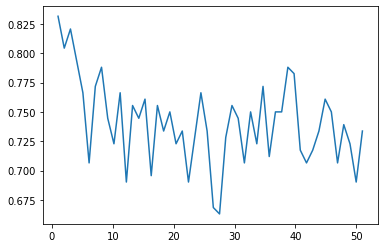

In [13]:
import matplotlib.pyplot as plt
index = np.linspace(1, 51, 50)
plt.plot(index, acc_list)

In [11]:
clf = LocalOutlierFactor(n_neighbors = 1, contamination = outlier_fraction, novelty=True)
clf.fit(train_neg)
result = clf.predict(test_tmp)

In [12]:
result = result.reshape(1000,1)
test_y = test_y.reshape(1000,1)
TP = ((test_y==1) & (result==-1)).sum()
FN = ((test_y==1) & (result==1)).sum()
FP = ((test_y==0) & (result==-1)).sum()
TN = ((test_y==0) & (result==1)).sum()
acc = (TP+TN)/1000
recall = TP/(TP+FN)
precision = TP/(TP+FP)
f1 = 2*precision*recall/(precision+recall)
print('accuracy: %.3f, recall: %.3f, precision: %.3f, related f1 score: %.3f'%(acc,recall,precision,f1))
print('In %d data of test set, TP: %d, FN: %d, FP: %d, TN: %d'%(len(test_y),TP,FN,FP,TN))

accuracy: 0.838, recall: 1.000, precision: 0.552, related f1 score: 0.712
In 1000 data of test set, TP: 200, FN: 0, FP: 162, TN: 638


In [13]:
result[np.where(result==1),:] = 0

In [14]:
result[np.where(result==-1),:] = 1

In [15]:
from sklearn.metrics import roc_auc_score
test_y = test_y.reshape(1000,1)
TP = ((test_y==1) & (result==1)).sum()
FN = ((test_y==1) & (result==0)).sum()
FP = ((test_y==0) & (result==1)).sum()
TN = ((test_y==0) & (result==0)).sum()
acc = (TP+TN)/1000
recall = TP/(TP+FN)
precision = TP/(TP+FP)
f1 = 2*precision*recall/(precision+recall)
auc_score = roc_auc_score(test_y, result)
print('accuracy: %.3f, recall: %.3f, precision: %.3f, related f1 score: %.3f, AUC: %.3f'%(acc,recall,precision,f1,auc_score))
print('In %d data of test set, TP: %d, FN: %d, FP: %d, TN: %d'%(len(test_y),TP,FN,FP,TN))

accuracy: 0.837, recall: 1.000, precision: 0.551, related f1 score: 0.710, AUC: 0.898
In 1000 data of test set, TP: 200, FN: 0, FP: 163, TN: 637
